In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(42)

In [6]:
data= pd.read_csv('Vehicle.csv', header = (0))

data = data.dropna(axis='rows')

classes = np.array(pd.unique(data[data.columns[-1]]), dtype = str)

feat_names = data.columns

attributes = list(data.columns[0:-2])

data.head(10)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [7]:
data = data.to_numpy()

y = data[:,-1]
X = data[:,0:-1]

In [8]:
from sklearn.model_selection import train_test_split

p = 0.2

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=p, random_state= 42)

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini', random_state=42)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)

print("Acurácia: ",score)

Acurácia:  0.7647058823529411


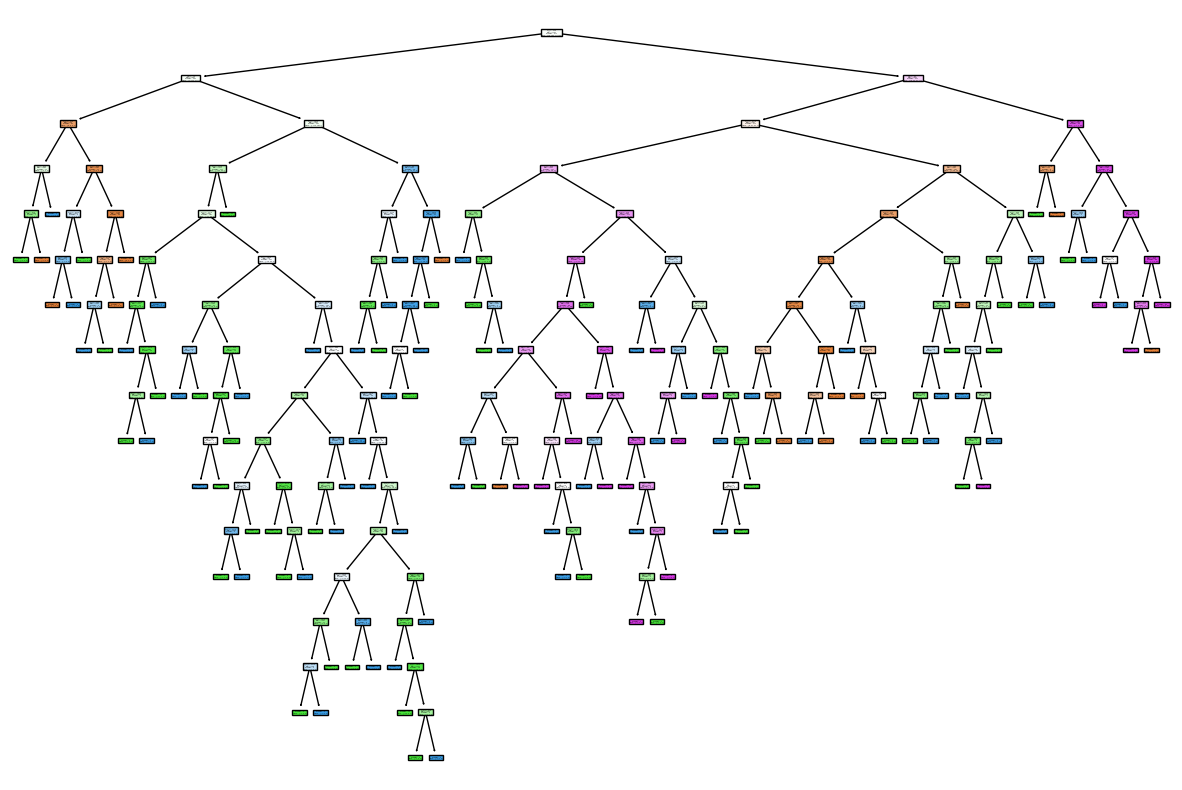

In [11]:
plt.figure(figsize=(15,10))

tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show()

In [12]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

score = accuracy_score(y_test,y_pred)

print("Acurácia: ", score)

Acurácia:  0.47058823529411764


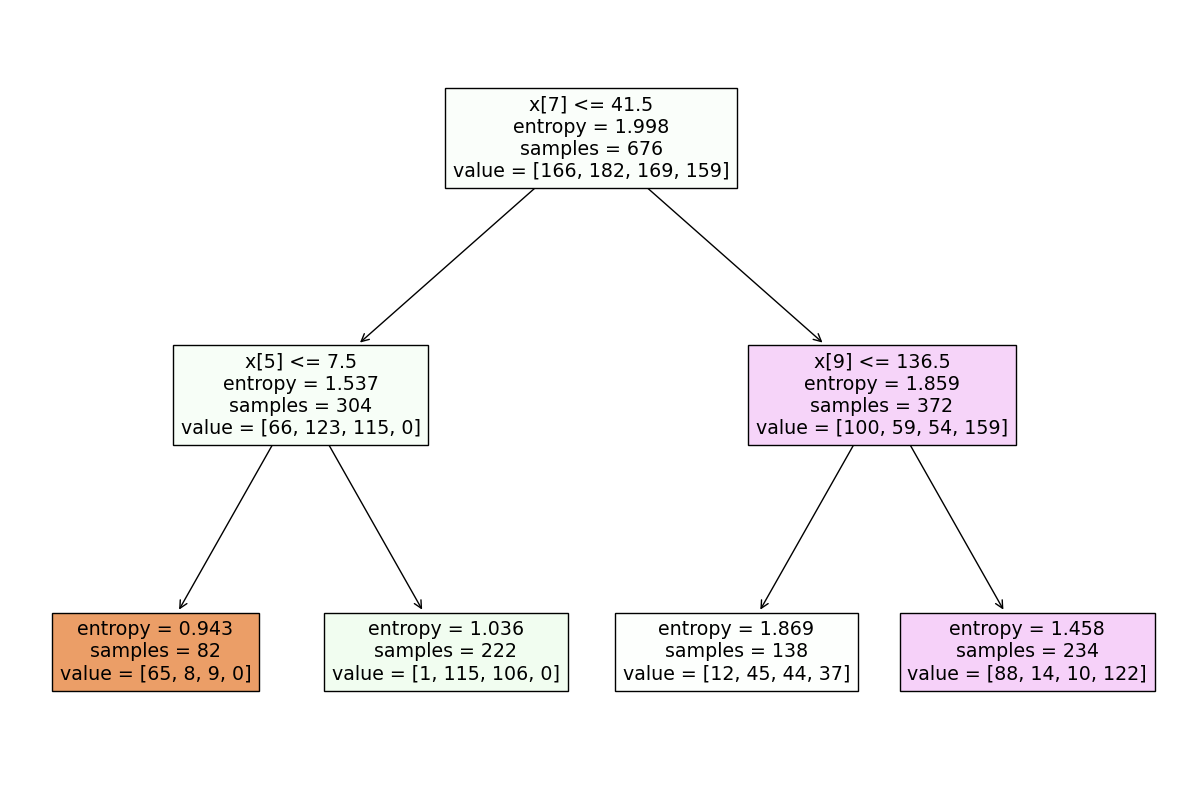

In [13]:
plt.figure(figsize=(15,10))

tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, bootstrap=True, 
                               class_weight=None,
                               max_depth=None,
                               max_features='sqrt',
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf= 1, min_samples_split=2,
                               min_weight_fraction_leaf= 0.0, n_jobs = 1,
                               oob_score=False,
                               random_state=None, verbose=0,
                               warm_start=False)

model.fit(x_train,y_train)
y_pred= model.predict(x_test)

score= accuracy_score(y_test,y_pred)

print("Acurácia: ", score)

Acurácia:  0.7647058823529411


Número de Estimadores: 1 Acurácia: 0.6941176470588235
Número de Estimadores: 11 Acurácia: 0.7529411764705882
Número de Estimadores: 21 Acurácia: 0.7411764705882353
Número de Estimadores: 31 Acurácia: 0.7294117647058823
Número de Estimadores: 41 Acurácia: 0.7352941176470589
Número de Estimadores: 51 Acurácia: 0.7705882352941177
Número de Estimadores: 61 Acurácia: 0.7470588235294118
Número de Estimadores: 71 Acurácia: 0.7352941176470589
Número de Estimadores: 81 Acurácia: 0.7705882352941177
Número de Estimadores: 91 Acurácia: 0.7764705882352941
Melhor n: 91 com acurácia: 0.7764705882352941


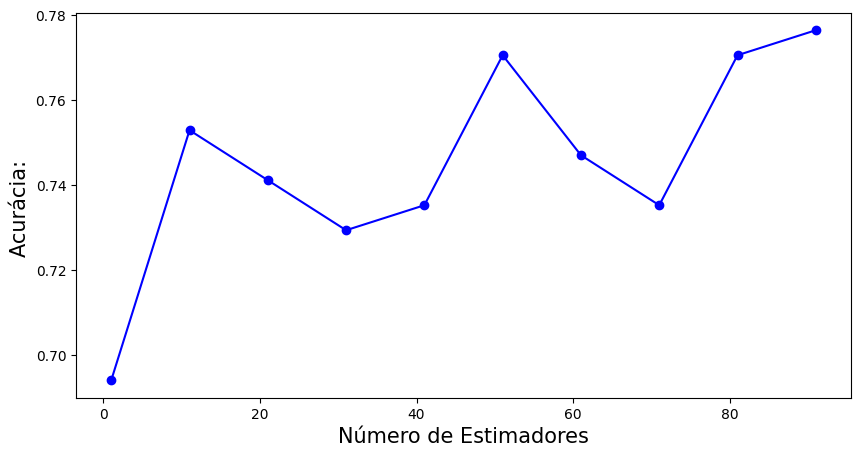

In [19]:
vscore= []

vn= []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    score= accuracy_score(y_test,y_pred)
    print("Número de Estimadores:", n, "Acurácia:", score)
    vscore.append(score)
    vn.append(n)

best_n= vn[np.argmax(vscore)]
print("Melhor n:",best_n,"com acurácia:",vscore[np.argmax(vscore)])
plt.figure(figsize=(10,5))
plt.plot(vn,vscore,'-bo')
plt.xlabel("Número de Estimadores",fontsize=15)
plt.ylabel("Acurácia: ",fontsize=15)
plt.show()

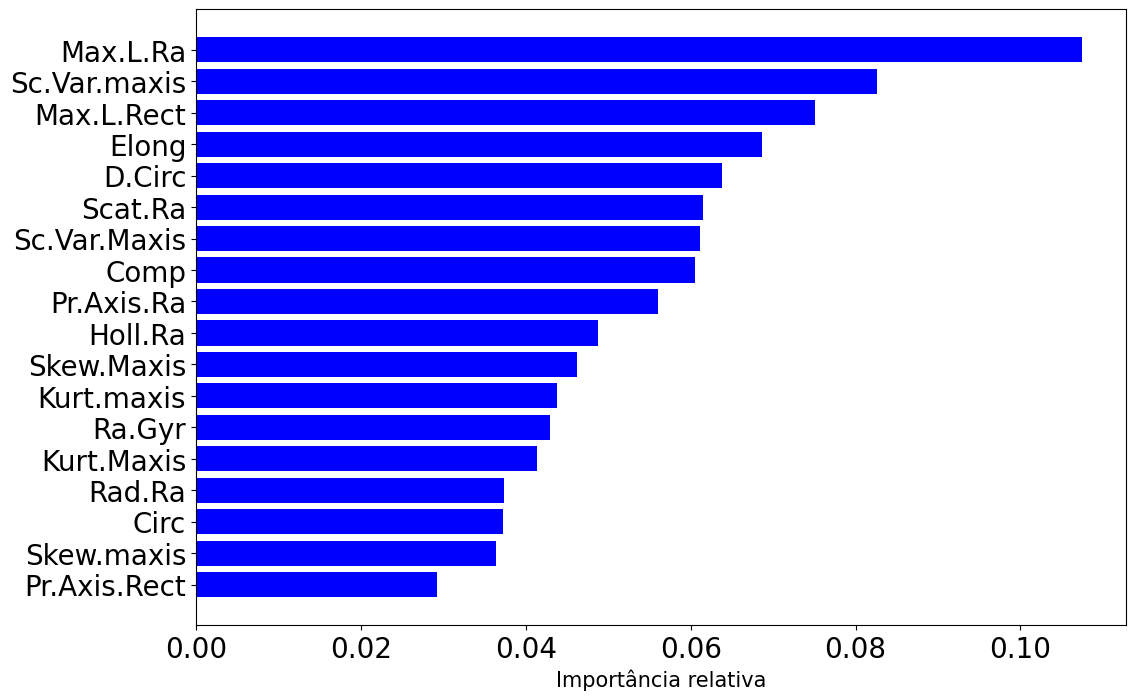

In [20]:
importancia = model.feature_importances_
indices = np.argsort(importancia)
ordem= []

for i in indices:
    ordem.append(feat_names[i])
                 
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)),importancia[indices], color='b', align= 'center')
plt.yticks(range(len(indices)), ordem, fontsize=15)
plt.xlabel("Importância relativa", fontsize=15)
plt.yticks(color='k', size=20)
plt.xticks(color='k', size=20)
plt.show()
